In [1]:
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary, MmCorpus
from gensim.models import LdaModel
from gensim.test.utils import datapath
import logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

/usr/local/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


The following scripts are from https://github.com/laurejt/authorless-tms

Obtain topic-genre correlation:

`! python3 estimated_topic_author_correlation.py gensim --input data/genre_reviews.tsv --lda-model /usr/local/lib/python3.9/site-packages/gensim/test/test_data/lda_20 --output genre_topic_cor.tsv -v`

(High entropy means topic is evenly spread among genres, low entropy means topic is concentrated in a particular genre)

Downsample corpus:

`! python3 downsample_corpus.py --input data/genre_reviews.tsv --vocab data/vocab.tsv --output data/down_genre_reviews.tsv --threshold 0.2 --min-doc-length 10 -v`

Run LDA with downsampled corpus:

In [2]:
# load data
dictionary = Dictionary.load("data/dictionary.pkl")
downsamp_out = pd.read_csv("data/down_genre_reviews.tsv", sep="\t", names=["doc_id","genre","tokens"])
train_reviews = downsamp_out["tokens"].apply(lambda tok: tok.split()).tolist()
train_corpus = [dictionary.doc2bow(rev) for rev in train_reviews]
print("Len train corpus: ", len(train_corpus))
test_corpus = MmCorpus("data/test_corpus.mm")

2021-05-31 17:11:26,854 : INFO : loading Dictionary object from data/dictionary.pkl
2021-05-31 17:11:26,864 : INFO : Dictionary lifecycle event {'fname': 'data/dictionary.pkl', 'datetime': '2021-05-31T17:11:26.864236', 'gensim': '4.0.1', 'python': '3.9.5 (default, May  4 2021, 03:36:27) \n[Clang 12.0.0 (clang-1200.0.32.29)]', 'platform': 'macOS-11.4-x86_64-i386-64bit', 'event': 'loaded'}
2021-05-31 17:11:32,160 : INFO : loaded corpus index from data/test_corpus.mm.index
2021-05-31 17:11:32,161 : INFO : initializing cython corpus reader from data/test_corpus.mm
2021-05-31 17:11:32,162 : INFO : accepted corpus with 1665 documents, 17974 features, 103674 non-zero entries


Len train corpus:  82311


2021-05-31 17:11:32,174 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2021-05-31 17:11:32,175 : INFO : using symmetric eta at 0.1
2021-05-31 17:11:32,177 : INFO : using serial LDA version on this node
2021-05-31 17:11:32,192 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 82311 documents, updating model once every 5000 documents, evaluating perplexity every 50000 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-31 17:11:32,193 : INFO : PROGRESS: pass 0, at document #5000/82311


Trying 10 Topics


2021-05-31 17:11:35,271 : INFO : optimized alpha [0.10208483, 0.08964038, 0.10472009, 0.12446845, 0.091764435, 0.097819895, 0.09612822, 0.10572193, 0.10043102, 0.10733935]
2021-05-31 17:11:35,277 : INFO : merging changes from 5000 documents into a model of 82311 documents
2021-05-31 17:11:35,284 : INFO : topic #1 (0.090): 0.007*"really" + 0.006*"character" + 0.006*"like" + 0.006*"series" + 0.006*"life" + 0.005*"would" + 0.005*"know" + 0.005*"get" + 0.005*"could" + 0.005*"first"
2021-05-31 17:11:35,285 : INFO : topic #4 (0.092): 0.011*"character" + 0.006*"much" + 0.006*"get" + 0.006*"like" + 0.005*"series" + 0.005*"time" + 0.005*"would" + 0.004*"know" + 0.004*"really" + 0.004*"love"
2021-05-31 17:11:35,286 : INFO : topic #7 (0.106): 0.012*"character" + 0.011*"like" + 0.009*"series" + 0.007*"time" + 0.007*"much" + 0.006*"love" + 0.006*"really" + 0.005*"good" + 0.005*"first" + 0.005*"way"
2021-05-31 17:11:35,287 : INFO : topic #9 (0.107): 0.011*"character" + 0.009*"like" + 0.007*"really" 

Held Out Perplexity


2021-05-31 17:12:22,283 : INFO : -10.265 per-word bound, 1230.4 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:12:22,287 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


1230.422107196136
Topic Coherence


2021-05-31 17:12:29,775 : INFO : 167 batches submitted to accumulate stats from 10688 documents (-364972 virtual)
2021-05-31 17:12:33,711 : INFO : 317 batches submitted to accumulate stats from 20288 documents (-670708 virtual)
2021-05-31 17:12:41,209 : INFO : 614 batches submitted to accumulate stats from 39296 documents (-1309955 virtual)
2021-05-31 17:12:42,848 : INFO : 677 batches submitted to accumulate stats from 43328 documents (-1441877 virtual)
2021-05-31 17:12:52,632 : INFO : 1068 batches submitted to accumulate stats from 68352 documents (-2279581 virtual)
2021-05-31 17:12:55,026 : INFO : 1160 batches submitted to accumulate stats from 74240 documents (-2481820 virtual)
2021-05-31 17:12:58,083 : INFO : 7 accumulators retrieved from output queue
2021-05-31 17:12:58,103 : INFO : accumulated word occurrence stats for 1703422 virtual documents
2021-05-31 17:12:58,501 : INFO : using autotuned alpha, starting with [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 

Trying 20 Topics


2021-05-31 17:13:01,709 : INFO : optimized alpha [0.05014062, 0.0458917, 0.05096908, 0.057436027, 0.04619709, 0.048834935, 0.04750924, 0.050639883, 0.048600063, 0.05136354, 0.04748817, 0.04818649, 0.054911084, 0.046779383, 0.051932655, 0.049910184, 0.04772603, 0.05085333, 0.04507651, 0.054263093]
2021-05-31 17:13:01,721 : INFO : merging changes from 5000 documents into a model of 82311 documents
2021-05-31 17:13:01,733 : INFO : topic #18 (0.045): 0.006*"like" + 0.006*"life" + 0.005*"think" + 0.005*"love" + 0.005*"really" + 0.004*"way" + 0.004*"time" + 0.004*"would" + 0.004*"much" + 0.004*"good"
2021-05-31 17:13:01,734 : INFO : topic #1 (0.046): 0.007*"really" + 0.006*"life" + 0.006*"character" + 0.006*"like" + 0.006*"would" + 0.005*"series" + 0.005*"get" + 0.005*"know" + 0.005*"time" + 0.005*"could"
2021-05-31 17:13:01,734 : INFO : topic #19 (0.054): 0.009*"like" + 0.007*"would" + 0.007*"character" + 0.006*"first" + 0.006*"get" + 0.006*"series" + 0.005*"novel" + 0.005*"life" + 0.005*"l

Held Out Perplexity


2021-05-31 17:13:52,155 : INFO : -11.481 per-word bound, 2858.5 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:13:52,161 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


2858.5205074002074
Topic Coherence


2021-05-31 17:14:01,522 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-368797 virtual)
2021-05-31 17:14:02,897 : INFO : 206 batches submitted to accumulate stats from 13184 documents (-444919 virtual)
2021-05-31 17:14:08,489 : INFO : 352 batches submitted to accumulate stats from 22528 documents (-750263 virtual)
2021-05-31 17:14:18,048 : INFO : 616 batches submitted to accumulate stats from 39424 documents (-1321551 virtual)
2021-05-31 17:14:20,397 : INFO : 679 batches submitted to accumulate stats from 43456 documents (-1453619 virtual)
2021-05-31 17:14:23,413 : INFO : 754 batches submitted to accumulate stats from 48256 documents (-1609583 virtual)
2021-05-31 17:14:29,455 : INFO : 922 batches submitted to accumulate stats from 59008 documents (-1982450 virtual)
2021-05-31 17:14:33,547 : INFO : 1037 batches submitted to accumulate stats from 66368 documents (-2231571 virtual)
2021-05-31 17:14:34,788 : INFO : 1071 batches submitted to accumulate stats from 6

Trying 30 Topics


2021-05-31 17:14:47,191 : INFO : optimized alpha [0.03316276, 0.03138202, 0.033683565, 0.036923327, 0.03134133, 0.03257313, 0.03217465, 0.033566754, 0.032863315, 0.033712775, 0.031887837, 0.032432675, 0.035561275, 0.03163166, 0.034017283, 0.03328009, 0.0319263, 0.033631623, 0.03084372, 0.035259116, 0.03063424, 0.034938637, 0.031500403, 0.033573505, 0.034953915, 0.031525742, 0.03280669, 0.03268459, 0.032842673, 0.03391058]
2021-05-31 17:14:47,213 : INFO : merging changes from 5000 documents into a model of 82311 documents
2021-05-31 17:14:47,233 : INFO : topic #20 (0.031): 0.016*"series" + 0.013*"love" + 0.012*"character" + 0.009*"like" + 0.006*"know" + 0.006*"could" + 0.005*"way" + 0.005*"make" + 0.005*"end" + 0.005*"really"
2021-05-31 17:14:47,234 : INFO : topic #18 (0.031): 0.008*"like" + 0.006*"love" + 0.006*"life" + 0.005*"think" + 0.005*"end" + 0.005*"would" + 0.005*"great" + 0.004*"time" + 0.004*"get" + 0.004*"way"
2021-05-31 17:14:47,235 : INFO : topic #19 (0.035): 0.009*"like" 

Held Out Perplexity


2021-05-31 17:15:43,842 : INFO : -12.461 per-word bound, 5636.8 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:15:43,852 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


5636.811668089103
Topic Coherence


2021-05-31 17:15:55,542 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369359 virtual)
2021-05-31 17:16:05,853 : INFO : 352 batches submitted to accumulate stats from 22528 documents (-751529 virtual)
2021-05-31 17:16:06,109 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-761727 virtual)
2021-05-31 17:16:15,996 : INFO : 546 batches submitted to accumulate stats from 34944 documents (-1173781 virtual)
2021-05-31 17:16:27,351 : INFO : 731 batches submitted to accumulate stats from 46784 documents (-1564984 virtual)
2021-05-31 17:16:43,858 : INFO : 1038 batches submitted to accumulate stats from 66432 documents (-2236268 virtual)
2021-05-31 17:16:46,674 : INFO : 1087 batches submitted to accumulate stats from 69568 documents (-2339718 virtual)
2021-05-31 17:16:50,420 : INFO : 1164 batches submitted to accumulate stats from 74496 documents (-2506489 virtual)
2021-05-31 17:16:54,166 : INFO : 1245 batches submitted to accumulate stats from

Trying 40 Topics


2021-05-31 17:17:01,834 : INFO : optimized alpha [0.02461299, 0.023839729, 0.02509148, 0.027110975, 0.023804568, 0.024436021, 0.02406368, 0.025065312, 0.024487324, 0.025347775, 0.024185121, 0.024420707, 0.026385035, 0.023929112, 0.025249612, 0.024888583, 0.024096852, 0.025224822, 0.023607513, 0.026217788, 0.023340069, 0.026115283, 0.023905696, 0.024954196, 0.025830092, 0.023933034, 0.024548868, 0.024637531, 0.024858057, 0.025324527, 0.025474792, 0.024502069, 0.024062805, 0.02521914, 0.025991093, 0.024483046, 0.024501354, 0.024675023, 0.023982527, 0.02356715]
2021-05-31 17:17:01,863 : INFO : merging changes from 5000 documents into a model of 82311 documents
2021-05-31 17:17:01,893 : INFO : topic #20 (0.023): 0.019*"series" + 0.014*"love" + 0.011*"character" + 0.009*"know" + 0.009*"like" + 0.006*"think" + 0.006*"end" + 0.006*"world" + 0.006*"great" + 0.005*"make"
2021-05-31 17:17:01,894 : INFO : topic #39 (0.024): 0.009*"time" + 0.007*"character" + 0.006*"reading" + 0.006*"love" + 0.006

Held Out Perplexity


2021-05-31 17:18:06,237 : INFO : -13.187 per-word bound, 9326.8 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:18:06,251 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


9326.787043556045
Topic Coherence


2021-05-31 17:18:20,010 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369538 virtual)
2021-05-31 17:18:22,355 : INFO : 206 batches submitted to accumulate stats from 13184 documents (-445762 virtual)
2021-05-31 17:18:32,033 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-762549 virtual)
2021-05-31 17:18:52,028 : INFO : 680 batches submitted to accumulate stats from 43520 documents (-1458669 virtual)
2021-05-31 17:18:56,759 : INFO : 755 batches submitted to accumulate stats from 48320 documents (-1615542 virtual)
2021-05-31 17:19:07,251 : INFO : 923 batches submitted to accumulate stats from 59072 documents (-1989672 virtual)
2021-05-31 17:19:16,967 : INFO : 1072 batches submitted to accumulate stats from 68608 documents (-2304310 virtual)
2021-05-31 17:19:32,364 : INFO : 7 accumulators retrieved from output queue
2021-05-31 17:19:32,575 : INFO : accumulated word occurrence stats for 1703753 virtual documents
2021-05-31 17:19:34,030 

Trying 50 Topics


2021-05-31 17:19:37,863 : INFO : optimized alpha [0.019869892, 0.019170634, 0.020007472, 0.02136372, 0.019237544, 0.019584864, 0.019388104, 0.019965395, 0.019726885, 0.019942792, 0.019380422, 0.01964294, 0.021050846, 0.019297404, 0.020323124, 0.019964186, 0.019448286, 0.019973207, 0.019061824, 0.020735372, 0.018932559, 0.020694526, 0.019229474, 0.02008732, 0.020502213, 0.01925085, 0.019631915, 0.019571392, 0.01984203, 0.020187913, 0.02019117, 0.019634563, 0.019325498, 0.020106511, 0.020731304, 0.019529298, 0.01969128, 0.019668542, 0.019176563, 0.019019201, 0.020185161, 0.020071654, 0.01956253, 0.020344088, 0.019787664, 0.019715713, 0.019904047, 0.019451741, 0.019710122, 0.019514998]
2021-05-31 17:19:37,907 : INFO : merging changes from 5000 documents into a model of 82311 documents
2021-05-31 17:19:37,943 : INFO : topic #20 (0.019): 0.013*"series" + 0.011*"love" + 0.010*"character" + 0.009*"like" + 0.007*"end" + 0.006*"know" + 0.006*"really" + 0.005*"make" + 0.005*"author" + 0.005*"goo

Held Out Perplexity


2021-05-31 17:20:47,067 : INFO : -13.929 per-word bound, 15600.0 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:20:47,084 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


15599.98028797791
Topic Coherence


2021-05-31 17:21:02,254 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369549 virtual)
2021-05-31 17:21:16,414 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-762557 virtual)
2021-05-31 17:21:20,469 : INFO : 411 batches submitted to accumulate stats from 26304 documents (-874418 virtual)
2021-05-31 17:21:40,721 : INFO : 680 batches submitted to accumulate stats from 43520 documents (-1458681 virtual)
2021-05-31 17:21:59,098 : INFO : 923 batches submitted to accumulate stats from 59072 documents (-1989565 virtual)
2021-05-31 17:22:09,822 : INFO : 1072 batches submitted to accumulate stats from 68608 documents (-2304288 virtual)
2021-05-31 17:22:27,433 : INFO : 7 accumulators retrieved from output queue
2021-05-31 17:22:27,720 : INFO : accumulated word occurrence stats for 1703753 virtual documents
2021-05-31 17:22:29,328 : INFO : using autotuned alpha, starting with [0.016666668, 0.016666668, 0.016666668, 0.016666668, 0.016666668, 0.0

Trying 60 Topics


2021-05-31 17:22:33,425 : INFO : optimized alpha [0.0165232, 0.016056143, 0.016555667, 0.017620921, 0.016056284, 0.01638739, 0.016196264, 0.016575623, 0.016537823, 0.016643733, 0.016215514, 0.016249921, 0.017146626, 0.016125588, 0.016771464, 0.016615525, 0.016181622, 0.016639087, 0.015913572, 0.017096492, 0.015841357, 0.01707003, 0.016143125, 0.016632397, 0.01692736, 0.01613251, 0.016421061, 0.016271107, 0.016371809, 0.016723862, 0.016735999, 0.016356613, 0.01624391, 0.016708052, 0.01700236, 0.016261192, 0.016399726, 0.016526438, 0.016173078, 0.015972393, 0.016756224, 0.016681788, 0.016220462, 0.016802028, 0.016525703, 0.016443098, 0.016458632, 0.016228374, 0.016506806, 0.016252704, 0.017493391, 0.016294207, 0.016896762, 0.016012887, 0.016733479, 0.016376695, 0.01631441, 0.016272835, 0.016613955, 0.017635487]
2021-05-31 17:22:33,466 : INFO : merging changes from 5000 documents into a model of 82311 documents
2021-05-31 17:22:33,508 : INFO : topic #20 (0.016): 0.013*"love" + 0.012*"char

Held Out Perplexity


2021-05-31 17:23:40,637 : INFO : -14.594 per-word bound, 24731.6 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:23:40,657 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


24731.631125234715
Topic Coherence


2021-05-31 17:24:01,001 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369626 virtual)
2021-05-31 17:24:02,876 : INFO : 188 batches submitted to accumulate stats from 12032 documents (-407238 virtual)
2021-05-31 17:24:19,600 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-762716 virtual)
2021-05-31 17:24:50,119 : INFO : 680 batches submitted to accumulate stats from 43520 documents (-1459772 virtual)
2021-05-31 17:25:49,036 : INFO : 7 accumulators retrieved from output queue
2021-05-31 17:25:49,539 : INFO : accumulated word occurrence stats for 1703768 virtual documents
2021-05-31 17:25:52,125 : INFO : using autotuned alpha, starting with [0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 0.014285714, 

Trying 70 Topics


2021-05-31 17:25:56,319 : INFO : optimized alpha [0.014186042, 0.013870435, 0.01425814, 0.014897132, 0.013837129, 0.014161611, 0.0139456, 0.014185473, 0.014092076, 0.014279157, 0.013929566, 0.013927762, 0.014713907, 0.013905769, 0.014302721, 0.014169337, 0.013963885, 0.014359481, 0.013792787, 0.014686022, 0.013681619, 0.014468564, 0.013822837, 0.014221767, 0.014419524, 0.013878065, 0.014067687, 0.01403902, 0.014176377, 0.014344256, 0.0143009825, 0.014053574, 0.013957812, 0.014132435, 0.014597939, 0.013943953, 0.014064149, 0.014017748, 0.0138656115, 0.013768472, 0.014341868, 0.014200978, 0.014036815, 0.014398104, 0.01425428, 0.014037983, 0.01419271, 0.013934593, 0.0141456695, 0.013970103, 0.014808919, 0.013995544, 0.014351071, 0.013802919, 0.014295571, 0.014022805, 0.014054121, 0.01397929, 0.014172013, 0.015053234, 0.014074032, 0.0145267835, 0.013983051, 0.014077062, 0.0140576735, 0.014309462, 0.0141024515, 0.014277742, 0.013761699, 0.014297811]
2021-05-31 17:25:56,369 : INFO : merging 

Held Out Perplexity


2021-05-31 17:27:10,454 : INFO : -15.143 per-word bound, 36181.5 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:27:10,477 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


36181.54670664207
Topic Coherence


2021-05-31 17:27:30,657 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369625 virtual)
2021-05-31 17:27:32,749 : INFO : 188 batches submitted to accumulate stats from 12032 documents (-407237 virtual)
2021-05-31 17:27:42,931 : INFO : 280 batches submitted to accumulate stats from 17920 documents (-600915 virtual)
2021-05-31 17:27:52,018 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-762712 virtual)
2021-05-31 17:28:24,934 : INFO : 680 batches submitted to accumulate stats from 43520 documents (-1459768 virtual)
2021-05-31 17:29:00,805 : INFO : 1039 batches submitted to accumulate stats from 66496 documents (-2241136 virtual)
2021-05-31 17:29:06,062 : INFO : 1088 batches submitted to accumulate stats from 69632 documents (-2344568 virtual)
2021-05-31 17:29:28,449 : INFO : 7 accumulators retrieved from output queue
2021-05-31 17:29:29,078 : INFO : accumulated word occurrence stats for 1703771 virtual documents
2021-05-31 17:29:33,070 

Trying 80 Topics


2021-05-31 17:29:40,405 : INFO : optimized alpha [0.0123583, 0.012093717, 0.012410587, 0.013041078, 0.01215781, 0.012317738, 0.012224452, 0.012424283, 0.012310987, 0.012497284, 0.01219607, 0.01227592, 0.012736025, 0.012150544, 0.012502292, 0.012413393, 0.012201377, 0.012412002, 0.01212707, 0.012660701, 0.012017518, 0.012625109, 0.012170699, 0.012407463, 0.012563931, 0.012177599, 0.012311843, 0.012269681, 0.012333563, 0.012540127, 0.012577209, 0.012298966, 0.012171465, 0.012411619, 0.012624446, 0.012225332, 0.012312751, 0.012339995, 0.012200791, 0.01206174, 0.0124889985, 0.012469462, 0.012295229, 0.012557445, 0.012394796, 0.012251845, 0.012390119, 0.012264961, 0.012364028, 0.012285533, 0.012804908, 0.012296384, 0.0124940695, 0.012099242, 0.012438635, 0.012256963, 0.012215663, 0.012214549, 0.01233558, 0.013022232, 0.012264636, 0.012649331, 0.012223094, 0.012365136, 0.012320899, 0.012540285, 0.01234763, 0.012554288, 0.012067046, 0.0124939, 0.012463405, 0.012426619, 0.012511827, 0.01307939

Held Out Perplexity


2021-05-31 17:31:33,230 : INFO : -15.602 per-word bound, 49734.5 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:31:33,254 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


49734.47425655444
Topic Coherence


2021-05-31 17:31:54,148 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369626 virtual)
2021-05-31 17:31:56,358 : INFO : 188 batches submitted to accumulate stats from 12032 documents (-407238 virtual)
2021-05-31 17:32:15,764 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-762716 virtual)
2021-05-31 17:32:51,200 : INFO : 680 batches submitted to accumulate stats from 43520 documents (-1459764 virtual)
2021-05-31 17:33:29,257 : INFO : 1027 batches submitted to accumulate stats from 65728 documents (-2219072 virtual)
2021-05-31 17:33:30,502 : INFO : 1039 batches submitted to accumulate stats from 66496 documents (-2241022 virtual)
2021-05-31 17:33:36,435 : INFO : 1088 batches submitted to accumulate stats from 69632 documents (-2344565 virtual)
2021-05-31 17:34:01,694 : INFO : 7 accumulators retrieved from output queue
2021-05-31 17:34:02,586 : INFO : accumulated word occurrence stats for 1703770 virtual documents
2021-05-31 17:34:07,05

Trying 90 Topics


2021-05-31 17:34:16,445 : INFO : optimized alpha [0.011010967, 0.010821615, 0.011022696, 0.0114493035, 0.01081305, 0.0108904485, 0.010893561, 0.011017309, 0.010963924, 0.0110658975, 0.010849558, 0.010944647, 0.011295301, 0.010824675, 0.011151421, 0.0110399695, 0.010820463, 0.01106587, 0.010770699, 0.011259346, 0.010744941, 0.011270094, 0.010798031, 0.010996091, 0.011158553, 0.010835138, 0.010917132, 0.011006326, 0.011016663, 0.011110202, 0.011141721, 0.010953004, 0.010891083, 0.0110569, 0.0112370085, 0.010875308, 0.010918705, 0.010981532, 0.010822164, 0.01077305, 0.011108554, 0.0110766385, 0.010902083, 0.0111527555, 0.011015682, 0.010972935, 0.010981453, 0.010886211, 0.010960175, 0.010863503, 0.011424949, 0.010876015, 0.0111061735, 0.010773411, 0.010999724, 0.010965457, 0.010904225, 0.010922344, 0.011060326, 0.011361244, 0.010938664, 0.011244726, 0.010905701, 0.010914802, 0.010933963, 0.011114938, 0.0109540345, 0.011048519, 0.010738226, 0.011068386, 0.011077893, 0.01095693, 0.01108883,

Held Out Perplexity


2021-05-31 17:36:46,518 : INFO : -16.134 per-word bound, 71936.9 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:36:46,545 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


71936.89508645266
Topic Coherence


2021-05-31 17:37:10,963 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369626 virtual)
2021-05-31 17:37:13,527 : INFO : 188 batches submitted to accumulate stats from 12032 documents (-407238 virtual)
2021-05-31 17:37:36,415 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-762815 virtual)
2021-05-31 17:38:23,794 : INFO : 680 batches submitted to accumulate stats from 43520 documents (-1460143 virtual)
2021-05-31 17:39:11,758 : INFO : 1039 batches submitted to accumulate stats from 66496 documents (-2241493 virtual)
2021-05-31 17:39:18,876 : INFO : 1088 batches submitted to accumulate stats from 69632 documents (-2344638 virtual)
2021-05-31 17:39:28,614 : INFO : 1165 batches submitted to accumulate stats from 74560 documents (-2512110 virtual)
2021-05-31 17:39:44,642 : INFO : 1287 batches submitted to accumulate stats from 82368 documents (-2782566 virtual)
2021-05-31 17:39:48,644 : INFO : 7 accumulators retrieved from output queue
202

Trying 100 Topics


2021-05-31 17:40:00,408 : INFO : optimized alpha [0.009838689, 0.009781525, 0.009940652, 0.010242381, 0.009778314, 0.009879521, 0.009806957, 0.0099797165, 0.0098914, 0.009928995, 0.009855561, 0.009856849, 0.010166855, 0.009763947, 0.009991426, 0.009977024, 0.009830741, 0.009910751, 0.009735437, 0.010122315, 0.00970003, 0.010024967, 0.009741436, 0.009880512, 0.010030592, 0.009784857, 0.009834165, 0.009811829, 0.009920459, 0.0099586025, 0.010017155, 0.0098652365, 0.009797052, 0.009984219, 0.010069821, 0.009844191, 0.009811923, 0.009870723, 0.009759465, 0.009716481, 0.009944684, 0.009949384, 0.009822114, 0.0100012375, 0.009913055, 0.009861547, 0.0099355895, 0.009815943, 0.0098598255, 0.009806763, 0.0101959435, 0.009877751, 0.009948623, 0.009752189, 0.010012622, 0.009860225, 0.009835538, 0.009819731, 0.009933063, 0.010271338, 0.009883396, 0.01009815, 0.0098395385, 0.009898773, 0.009899991, 0.010014784, 0.009879747, 0.009947252, 0.009689895, 0.009989311, 0.00999368, 0.009904798, 0.00999135,

Held Out Perplexity


2021-05-31 17:42:14,401 : INFO : -16.575 per-word bound, 97661.1 perplexity estimate based on a held-out corpus of 1665 documents with 125726 words
2021-05-31 17:42:14,432 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


97661.07366928826
Topic Coherence


2021-05-31 17:42:41,883 : INFO : 168 batches submitted to accumulate stats from 10752 documents (-369663 virtual)
2021-05-31 17:42:44,632 : INFO : 188 batches submitted to accumulate stats from 12032 documents (-407330 virtual)
2021-05-31 17:42:58,170 : INFO : 280 batches submitted to accumulate stats from 17920 documents (-601095 virtual)
2021-05-31 17:43:09,417 : INFO : 358 batches submitted to accumulate stats from 22912 documents (-762828 virtual)
2021-05-31 17:43:46,562 : INFO : 617 batches submitted to accumulate stats from 39488 documents (-1327220 virtual)
2021-05-31 17:43:55,505 : INFO : 680 batches submitted to accumulate stats from 43520 documents (-1460141 virtual)
2021-05-31 17:44:45,779 : INFO : 1039 batches submitted to accumulate stats from 66496 documents (-2241531 virtual)
2021-05-31 17:44:53,302 : INFO : 1088 batches submitted to accumulate stats from 69632 documents (-2344680 virtual)
2021-05-31 17:45:21,478 : INFO : 1287 batches submitted to accumulate stats from 8

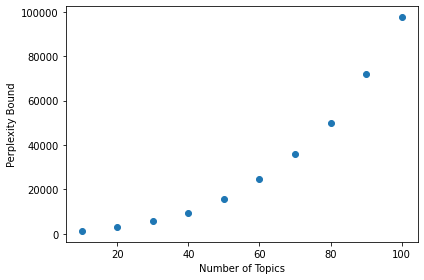

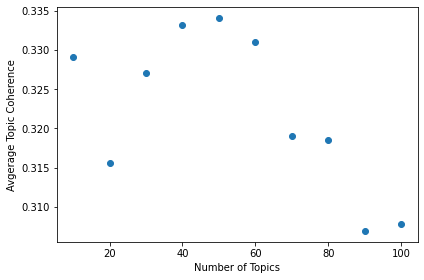

In [3]:
# run model for each topic size
topics_try = [10,20,30,40,50,60,70,80,90,100]
perplexities = []
coherences = []

for k in topics_try:
    print("Trying "+str(k)+" Topics")
    # parameters
    num_topics = k
    chunksize = 5000 # optimal in online learning paper
    alpha = "auto" # prior on topic proportions
    # eta default symmetric
    # decay/offset at defaults 0.5/1 (kappa/tau in online lda paper)

    # load dictionary
    temp = dictionary[0]
    id2word = dictionary.id2token

    # train model
    model = LdaModel(corpus=train_corpus,
                     num_topics=num_topics,
                     id2word=id2word,
                     chunksize=chunksize,
                     alpha=alpha,
                     random_state=271)

    model.save(datapath("authorless_"+str(num_topics)))

    # perplexity on test set
    print("Held Out Perplexity")
    bound = model.log_perplexity(test_corpus)
    print(2**(-bound))
    perplexities.append(2**(-bound))

    # topic coherence
    print("Topic Coherence")
    top_topics = model.top_topics(texts=train_reviews, dictionary=dictionary, coherence="c_v")
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    coherences.append(avg_topic_coherence)
    
plt.figure()
plt.scatter(topics_try, perplexities)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Bound")
plt.tight_layout()
plt.savefig("Authorless_Perplexities.png")

plt.figure()
plt.scatter(topics_try, coherences)
plt.xlabel("Number of Topics")
plt.ylabel("Avgerage Topic Coherence")
plt.tight_layout()
plt.savefig("Authorless_Coherences.png")